# Iris Classification

![Iris flowers](https://miro.medium.com/max/945/0*Uw37vrrKzeEWahdB)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# The Data
This dataset has 4 features for each of the three species of the Iris flowers.  
These features are :
1. The length of sepal
2. The width of sepal
3. The length of petal
4. The width of petal.
All these vales are in the float format

The target is the species column which is categorical and has 3 unique values: `setosa`, `versicolor` and `virginica`.  
There are total 150 rows of data. 50 rows for each species

In [2]:
df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Correlation matrix
From the correlation matrix and heatmap we can see that sepal length has high correaltion with petal lenth and petal width.  
Also petal length is highly correlated with petal width. 

In [5]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


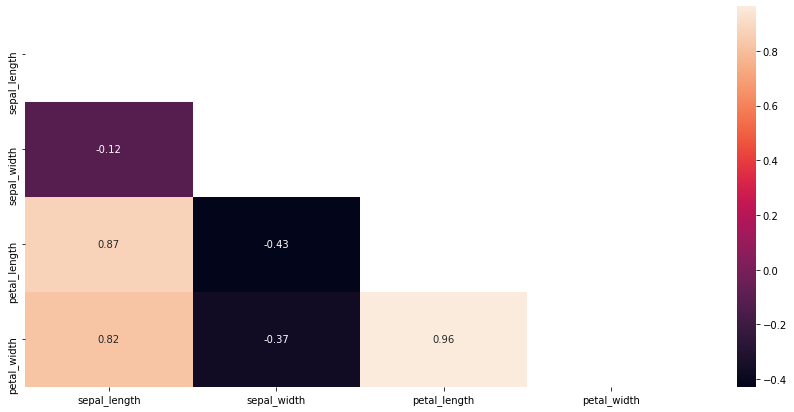

In [6]:
x = np.triu(df.corr())
plt.figure(figsize=(15,7))
sns.heatmap(data= df.corr(), mask=x, annot=True)
plt.show()

In [7]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [8]:
df.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


## Exploratory Data analysis
Looking at the distribution of each of the features with respect to the species we can claerly see how each species differ from the other.  
The pairplot also shows clear distinction between the species 

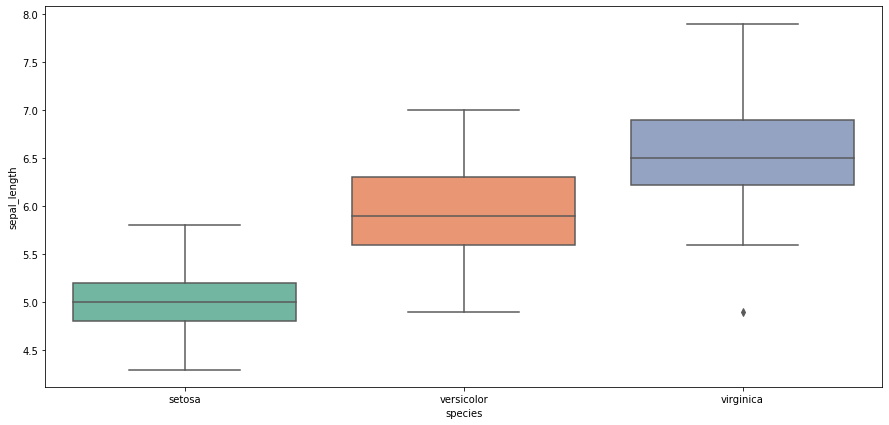

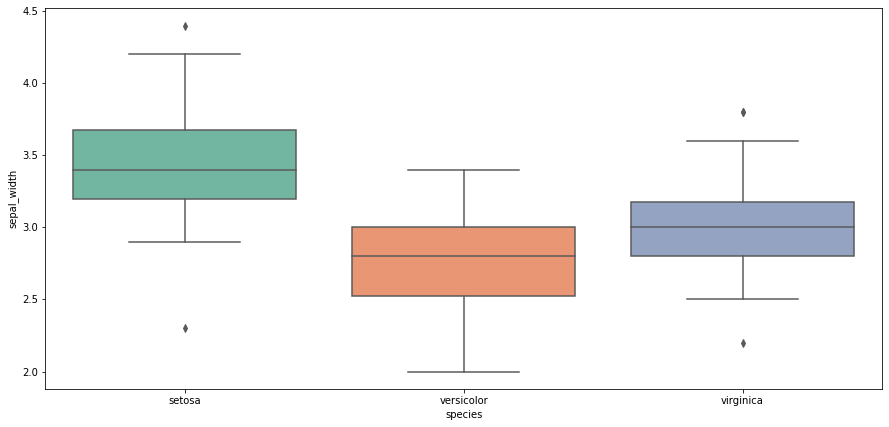

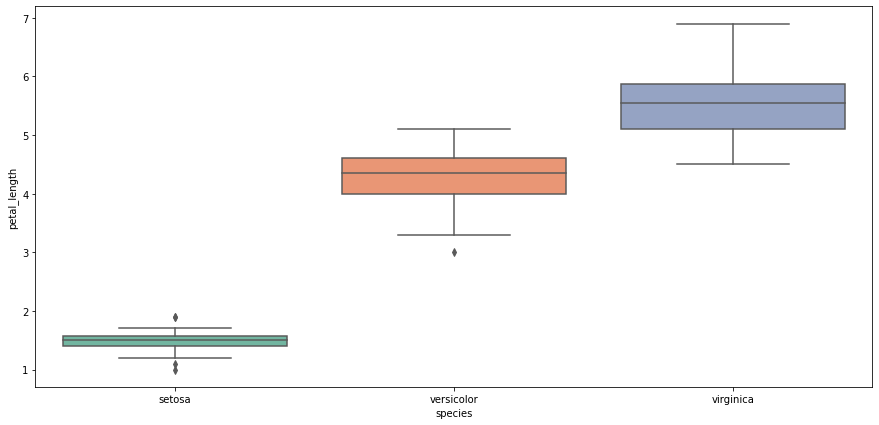

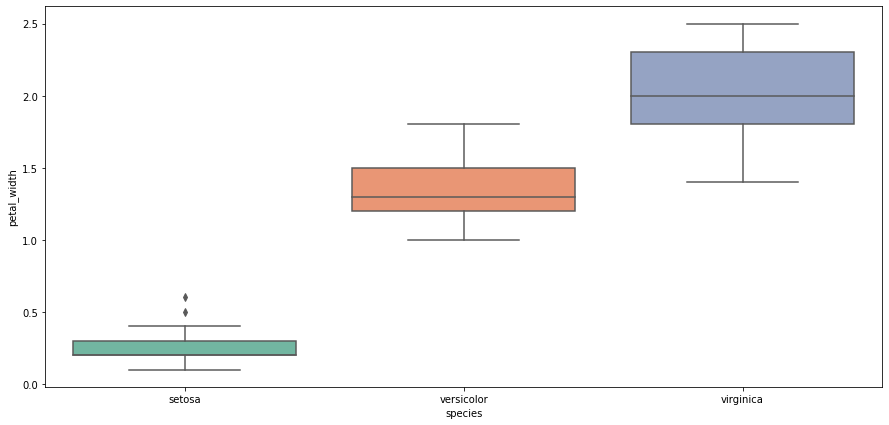

In [9]:
sns.set_palette('Set2')
for i in ['sepal_length','sepal_width','petal_length','petal_width']:
    plt.figure(figsize=(15,7))
    sns.boxplot(data=df, y=i, x='species')
    plt.show()

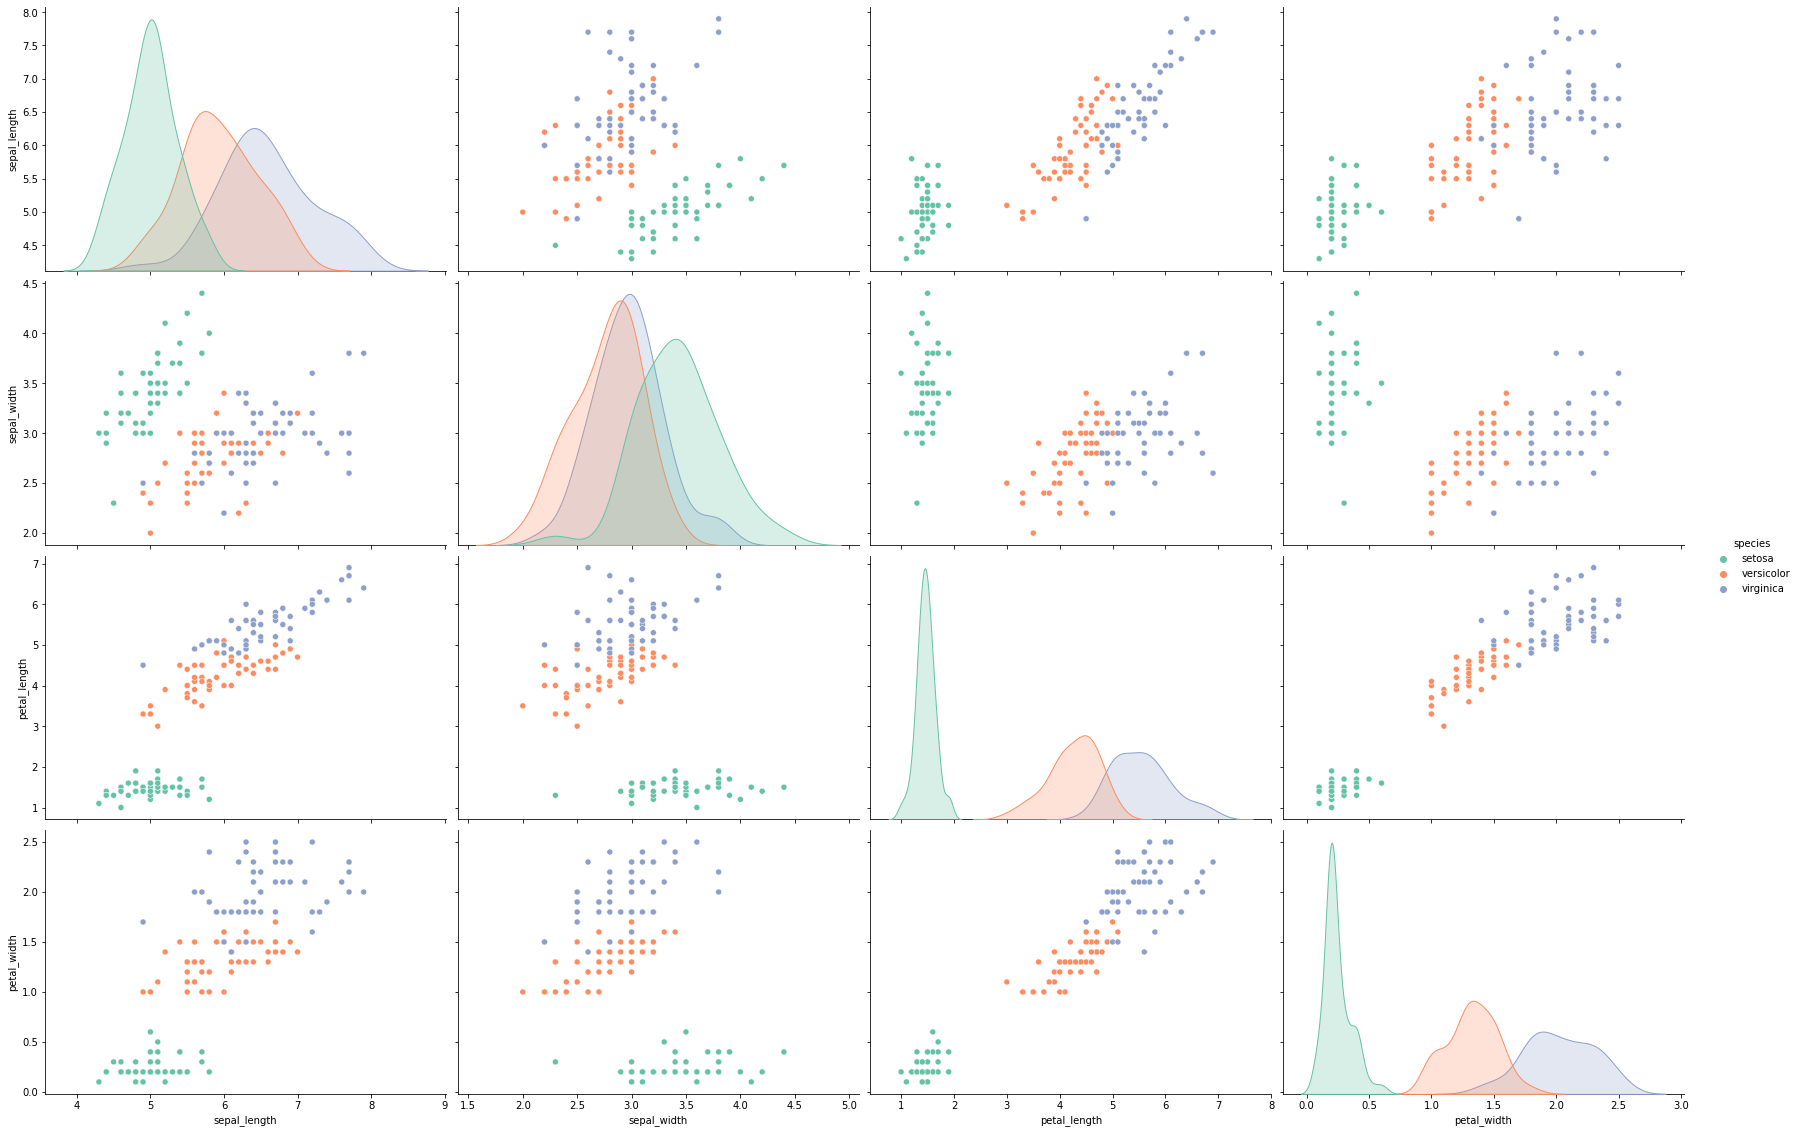

In [10]:
sns.pairplot(df, hue='species', height=4, aspect=1.5)

# Model Building

The species column is first mapped to integer values to fit the model.  
Then the dataset in split into training and testing.  
20% of data is used for testing

In [11]:
df['species'] = df['species'].map({'setosa' : 0, 'versicolor' : 1, 'virginica' : 2})
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
146,6.3,2.5,5.0,1.9,2
129,7.2,3.0,5.8,1.6,2
100,6.3,3.3,6.0,2.5,2
89,5.5,2.5,4.0,1.3,1
125,7.2,3.2,6.0,1.8,2


In [12]:
from sklearn.model_selection import train_test_split
X = df[['sepal_length','sepal_width','petal_length','petal_width']]
y = df['species']
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size=0.2, random_state=0)


## Checking Model accuracy
A function to fit the model and check its accuracy through a classification report and by plotting the confusion matrix

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, classification_report
def model_predict(model, train_X, test_X, train_y, test_y):
    model.fit(train_X, train_y)
    pred = model.predict(test_X)
    conf_matrix = confusion_matrix(test_y, pred)
    print(classification_report(test_y, pred))
    plot_confusion_matrix(model, test_X, test_y)
    return pred

## Testing different algothihms

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



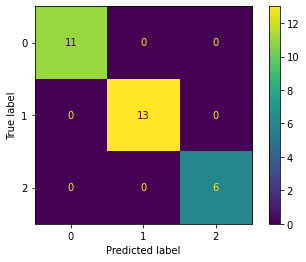

In [14]:
from sklearn.svm import SVC
model = SVC()
pred = model_predict(model, train_X, test_X, train_y, test_y)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      1.00      0.96        13
           2       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



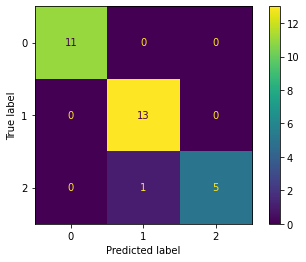

In [15]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
pred = model_predict(model, train_X, test_X, train_y, test_y)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



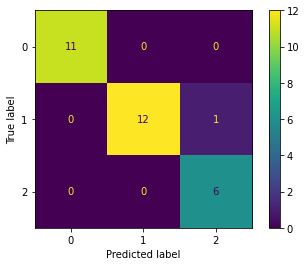

In [16]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
pred = model_predict(model, train_X, test_X, train_y, test_y)


# Final Model and prediction:
The Support Vector machine is chosen as the final model and a function is made for making predictions

In [17]:
def prediction(value, model):
  pred = model.predict(value)
  names = []
  for i in pred:
    if i == 0:
      names.append('setosa')
    elif i == 1:
      names.append('versicolor')
    else:
      names.append('virginica')
  return names

final_model = SVC()
final_model.fit(X,y)

values = [[5, 3, 1.5, 0.2],
          [6.2, 3, 4, 1.5],
            [6, 3.5, 5,2]]

pred = prediction(values, final_model)
pred


['setosa', 'versicolor', 'virginica']